# Video Games Sales

In [62]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import squarify
import numpy as np
import os

# Explanation for the database

### Link to dataset (Kaggle)
https://www.kaggle.com/karangadiya/fifa19

### Context
Football analytics

### Content
Detailed attributes for every player registered in the latest edition of FIFA 19 database.
Scraping code at GitHub repo: https://github.com/amanthedorkknight/fifa18-all-player-statistics/tree/master/2019

### Acknowledgements
Data scraped from https://sofifa.com/

### Inspiration
Inspired from this dataset: https://www.kaggle.com/thec03u5/fifa-18-demo-player-dataset

## Importing the database

In [2]:
os.getcwd()

'/Users/oleoaraujo/Documents/GitHub/data-ft-par-labs/Projects/Week-4'

In [4]:
fifa = pd.read_csv("data/FIFA19.csv")
fifa.head(15)

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M
5,5,183277,E. Hazard,27,https://cdn.sofifa.org/players/4/19/183277.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,91,Chelsea,...,91.0,34.0,27.0,22.0,11.0,12.0,6.0,8.0,8.0,€172.1M
6,6,177003,L. Modrić,32,https://cdn.sofifa.org/players/4/19/177003.png,Croatia,https://cdn.sofifa.org/flags/10.png,91,91,Real Madrid,...,84.0,60.0,76.0,73.0,13.0,9.0,7.0,14.0,9.0,€137.4M
7,7,176580,L. Suárez,31,https://cdn.sofifa.org/players/4/19/176580.png,Uruguay,https://cdn.sofifa.org/flags/60.png,91,91,FC Barcelona,...,85.0,62.0,45.0,38.0,27.0,25.0,31.0,33.0,37.0,€164M
8,8,155862,Sergio Ramos,32,https://cdn.sofifa.org/players/4/19/155862.png,Spain,https://cdn.sofifa.org/flags/45.png,91,91,Real Madrid,...,82.0,87.0,92.0,91.0,11.0,8.0,9.0,7.0,11.0,€104.6M
9,9,200389,J. Oblak,25,https://cdn.sofifa.org/players/4/19/200389.png,Slovenia,https://cdn.sofifa.org/flags/44.png,90,93,Atlético Madrid,...,70.0,27.0,12.0,18.0,86.0,92.0,78.0,88.0,89.0,€144.5M


### Understanding the database

In [5]:
fifa.shape

(18207, 89)

In [6]:
fifa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 89 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                18207 non-null  int64  
 1   ID                        18207 non-null  int64  
 2   Name                      18207 non-null  object 
 3   Age                       18207 non-null  int64  
 4   Photo                     18207 non-null  object 
 5   Nationality               18207 non-null  object 
 6   Flag                      18207 non-null  object 
 7   Overall                   18207 non-null  int64  
 8   Potential                 18207 non-null  int64  
 9   Club                      17966 non-null  object 
 10  Club Logo                 18207 non-null  object 
 11  Value                     18207 non-null  object 
 12  Wage                      18207 non-null  object 
 13  Special                   18207 non-null  int64  
 14  Prefer

In [7]:
# Numeric variables
print(fifa.select_dtypes(include='number').dtypes)

Unnamed: 0                    int64
ID                            int64
Age                           int64
Overall                       int64
Potential                     int64
Special                       int64
International Reputation    float64
Weak Foot                   float64
Skill Moves                 float64
Jersey Number               float64
Crossing                    float64
Finishing                   float64
HeadingAccuracy             float64
ShortPassing                float64
Volleys                     float64
Dribbling                   float64
Curve                       float64
FKAccuracy                  float64
LongPassing                 float64
BallControl                 float64
Acceleration                float64
SprintSpeed                 float64
Agility                     float64
Reactions                   float64
Balance                     float64
ShotPower                   float64
Jumping                     float64
Stamina                     

In [8]:
# Categorical variables
print(fifa.select_dtypes(include='object').dtypes)

Name                    object
Photo                   object
Nationality             object
Flag                    object
Club                    object
Club Logo               object
Value                   object
Wage                    object
Preferred Foot          object
Work Rate               object
Body Type               object
Real Face               object
Position                object
Joined                  object
Loaned From             object
Contract Valid Until    object
Height                  object
Weight                  object
LS                      object
ST                      object
RS                      object
LW                      object
LF                      object
CF                      object
RF                      object
RW                      object
LAM                     object
CAM                     object
RAM                     object
LM                      object
LCM                     object
CM                      object
RCM     

In [9]:
fifa.describe(include="all")

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
count,18207.000000,18207.000000,18207,18207.000000,18207,18207,18207,18207.000000,18207.000000,17966,...,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,16643
unique,NaN,NaN,17194,NaN,18207,164,164,NaN,NaN,651,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1244
top,NaN,NaN,J. Rodríguez,NaN,https://cdn.sofifa.org/players/4/19/229064.png,England,https://cdn.sofifa.org/flags/14.png,NaN,NaN,Rayo Vallecano,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,€1.1M
freq,NaN,NaN,11,NaN,1,1662,1662,NaN,NaN,33,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,557
mean,9103.000000,214298.338606,NaN,25.122206,NaN,NaN,NaN,66.238699,71.307299,NaN,...,58.648274,47.281623,47.697836,45.661435,16.616223,16.391596,16.232061,16.388898,16.710887,NaN
std,5256.052511,29965.244204,NaN,4.669943,NaN,NaN,NaN,6.908930,6.136496,NaN,...,11.436133,19.904397,21.664004,21.289135,17.695349,16.906900,16.502864,17.034669,17.955119,NaN
min,0.000000,16.000000,NaN,16.000000,NaN,NaN,NaN,46.000000,48.000000,NaN,...,3.000000,3.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,NaN
25%,4551.500000,200315.500000,NaN,21.000000,NaN,NaN,NaN,62.000000,67.000000,NaN,...,51.000000,30.000000,27.000000,24.000000,8.000000,8.000000,8.000000,8.000000,8.000000,NaN
50%,9103.000000,221759.000000,NaN,25.000000,NaN,NaN,NaN,66.000000,71.000000,NaN,...,60.000000,53.000000,55.000000,52.000000,11.000000,11.000000,11.000000,11.000000,11.000000,NaN
75%,13654.500000,236529.500000,NaN,28.000000,NaN,NaN,NaN,71.000000,75.000000,NaN,...,67.000000,64.000000,66.000000,64.000000,14.000000,14.000000,14.000000,14.000000,14.000000,NaN


## Analyzing and cleaning the database

#### Resetting index

In [30]:
fifa.set_index("ID", inplace=True)
fifa.head()

,Name,Age,Nationality,Overall,Potential,Club,Special,Preferred Foot,International Reputation,Weak Foot,...,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause (M€),Value (M€),Wage (M€)
ID,,,,,,,,,,,,,,,,,,,,,
158023,L. Messi,31,Argentina,94,94,FC Barcelona,2202,Left,5.0,4.0,...,28.0,26.0,6.0,11.0,15.0,14.0,8.0,226.5,110.5,0.565
20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,2228,Right,5.0,4.0,...,31.0,23.0,7.0,11.0,15.0,14.0,11.0,127.1,77.0,0.405
190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,2143,Right,5.0,5.0,...,24.0,33.0,9.0,9.0,15.0,15.0,11.0,228.1,118.5,0.290
193080,De Gea,27,Spain,91,93,Manchester United,1471,Right,4.0,3.0,...,21.0,13.0,90.0,85.0,87.0,88.0,94.0,138.6,72.0,0.260
192985,K. De Bruyne,27,Belgium,91,92,Manchester City,2281,Right,4.0,5.0,...,58.0,51.0,15.0,13.0,5.0,10.0,13.0,196.4,102.0,0.355


#### Droping useless columns and resetting index

In [22]:
print(fifa.shape)
fifa.dropna(how="all", axis=0)
fifa.dropna(how="all", axis=1)
print(fifa.shape)

(18207, 83)
(18207, 83)


In [12]:
print(list(fifa.columns))

['Unnamed: 0', 'Name', 'Age', 'Photo', 'Nationality', 'Flag', 'Overall', 'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special', 'Preferred Foot', 'International Reputation', 'Weak Foot', 'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position', 'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until', 'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW', 'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM', 'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling', 'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration', 'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure', 'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes', 'Release Clause']


In [13]:
fifa.drop(columns=["Unnamed: 0", "Photo", "Flag", "Real Face", "Club Logo"],inplace=True)

In [15]:
print(list(fifa.columns))
print(len(list(fifa.columns)))

['Name', 'Age', 'Nationality', 'Overall', 'Potential', 'Club', 'Value', 'Wage', 'Special', 'Preferred Foot', 'International Reputation', 'Weak Foot', 'Skill Moves', 'Work Rate', 'Body Type', 'Position', 'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until', 'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW', 'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM', 'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling', 'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration', 'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure', 'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes', 'Release Clause']
83


#### Agregating Columns with Players Skills

In [83]:
# Based on the website SoFifa.com, the columns aggregates as following:
fifa["Attacking"] = (fifa['Crossing'] + fifa['Finishing'] + fifa['HeadingAccuracy'] + fifa['ShortPassing'] + fifa['Volleys'])/5

fifa["Skill"] = (fifa['Dribbling'] + fifa['Curve'] + fifa['FKAccuracy'] + fifa['LongPassing'] + fifa['BallControl'])/5

fifa["Movement"] = (fifa['Acceleration'] + fifa['SprintSpeed'] + fifa['Agility'] + fifa['Reactions'] + fifa['Balance'])/5

fifa["Power"] = (fifa['ShotPower'] + fifa['Jumping'] + fifa['Stamina'] + fifa['Strength'] + fifa['LongShots'])/5

fifa["Mentality"] = (fifa['Aggression'] + fifa['Interceptions'] + fifa['Positioning'] + fifa['Vision'] + fifa['Penalties'] + fifa['Composure'])/6

fifa["Defending"] = (fifa['Marking'] + fifa['StandingTackle'] + fifa['SlidingTackle'])/3

fifa["Goal Keeping"] = (fifa['GKDiving'] + fifa['GKHandling'] + fifa['GKKicking'] + fifa['GKPositioning'] + fifa['GKReflexes'])/5

# Saving in a new variable in case we need these columns later on

# Droping all columns that have been aggregated
fifa.drop(columns=['Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling', 'Curve',
                   'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration', 'SprintSpeed', 'Agility', 'Reactions',
                   'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression','Interceptions',
                   'Positioning', 'Vision', 'Penalties', 'Composure', 'Marking', 'StandingTackle','SlidingTackle',
                   'GKDiving', 'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes'], inplace=True)



# Checking the new result
print(list(fifa.columns))
print(len(list(fifa.columns)))



['Name', 'Age', 'Nationality', 'Overall', 'Potential', 'Club', 'Special', 'Preferred Foot', 'International Reputation', 'Weak Foot', 'Skill Moves', 'Work Rate', 'Body Type', 'Position', 'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until', 'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW', 'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM', 'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Release Clause (M€)', 'Value (M€)', 'Wage (M€)', 'Attacking', 'Skill', 'Movement', 'Power', 'Mentality', 'Defending', 'Goal Keeping']
56


#### Cleaning countries names

In [16]:
fifa.Nationality = (fifa.Nationality.str.replace("United States", "United States of America")
                    .replace("China PR", "China").replace("DR Congo","Dem. Rep. Congo")
                    .replace("Republic of Ireland","Ireland").replace("Korea Republic","South Korea")
                    .replace("Guinea Bissau",'Guinea-Bissau').replace('FYR Macedonia','Macedonia'))

#### Cleaning column "Release Clause"

In [17]:
# Checking that I only have numbers finishing by "K" and "M"
set(fifa["Release Clause"].str[-1:])

{'K', 'M', nan}

In [19]:
# Checking the number of NaNs
print(fifa["Release Clause"].isna().sum())

# Filling the NaNs with 0 (hypothesis: they don't have a release clause)
fifa["Release Clause"].fillna("0", inplace=True)

# Checking the result
print(fifa["Release Clause"].isna().sum())

1564
0


In [20]:
def clean_currencies(df, column_name):
    """Function to clean and uniformize all the columns with currencies in euros (€)
    
    Input: dataframe
    Output: dataframe with columns cleaned from the currency number and transformed to millions units
    """
    
    # Cleaning the currency from the cells
    df["Support_column"] = df[column_name].str.replace("€","")

    # Cleaning the Release clause from its units ("M" for Million or "K" for Thousands)
    transform_to_euros = lambda x: (float(x[:len(x)-1])*10**6) if (x[-1]=="M") else (float(x[:len(x)-1])*10**3 if x[-1]=="K" else float(x))
    df["Support_column"] = df["Support_column"].apply(transform_to_euros)

    # Now formating it so it show values in M€ for all cells 
    divide_by_million = lambda x: x/1000000
    df["Support_column"] = df["Support_column"].apply(divide_by_million).round(3)

    # Droping ancient columns, leaving only our main column
    df.rename(columns={"Support_column":(str(column_name)+" (M€)")}, inplace=True)
    df.drop(columns=[str(column_name)], inplace=True)

    return df


# Applying the cleanup function stated before
fifa = clean_currencies(fifa, "Release Clause")
fifa = clean_currencies(fifa, "Value")
fifa = clean_currencies(fifa, "Wage")
fifa

,Name,Age,Nationality,Overall,Potential,Club,Special,Preferred Foot,International Reputation,Weak Foot,...,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause (M€),Value (M€),Wage (M€)
ID,,,,,,,,,,,,,,,,,,,,,
158023,L. Messi,31,Argentina,94,94,FC Barcelona,2202,Left,5.0,4.0,...,28.0,26.0,6.0,11.0,15.0,14.0,8.0,226.500,110.50,0.565
20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,2228,Right,5.0,4.0,...,31.0,23.0,7.0,11.0,15.0,14.0,11.0,127.100,77.00,0.405
190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,2143,Right,5.0,5.0,...,24.0,33.0,9.0,9.0,15.0,15.0,11.0,228.100,118.50,0.290
193080,De Gea,27,Spain,91,93,Manchester United,1471,Right,4.0,3.0,...,21.0,13.0,90.0,85.0,87.0,88.0,94.0,138.600,72.00,0.260
192985,K. De Bruyne,27,Belgium,91,92,Manchester City,2281,Right,4.0,5.0,...,58.0,51.0,15.0,13.0,5.0,10.0,13.0,196.400,102.00,0.355
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238813,J. Lundstram,19,England,47,65,Crewe Alexandra,1307,Right,1.0,2.0,...,48.0,47.0,10.0,13.0,7.0,8.0,9.0,0.143,0.06,0.001
243165,N. Christoffersson,19,Sweden,47,63,Trelleborgs FF,1098,Right,1.0,2.0,...,15.0,19.0,10.0,9.0,9.0,5.0,12.0,0.113,0.06,0.001
241638,B. Worman,16,England,47,67,Cambridge United,1189,Right,1.0,3.0,...,13.0,11.0,6.0,5.0,10.0,6.0,13.0,0.165,0.06,0.001


### Count of unique values

In [23]:
fifa.nunique()

Name                   17194
Age                       29
Nationality              164
Overall                   48
Potential                 47
                       ...  
GKPositioning             79
GKReflexes                76
Release Clause (M€)     1245
Value (M€)               217
Wage (M€)                144
Length: 83, dtype: int64

In [24]:
# We have some names that are not unique, but they seemly correspond to different people,
# as we can see by checking their Club, Nationality and Age
fifa[fifa.Name=="J. Rodríguez"]

,Name,Age,Nationality,Overall,Potential,Club,Special,Preferred Foot,International Reputation,Weak Foot,...,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause (M€),Value (M€),Wage (M€)
ID,,,,,,,,,,,,,,,,,,,,,
198710,J. Rodríguez,26,Colombia,88,89,FC Bayern München,2171,Left,4.0,3.0,...,41.0,44.0,15.0,15.0,15.0,5.0,14.0,0.000,69.500,0.315
192009,J. Rodríguez,25,Mexico,74,77,Lobos BUAP,1217,Right,1.0,3.0,...,11.0,12.0,77.0,71.0,66.0,75.0,73.0,0.000,5.000,0.022
223816,J. Rodríguez,24,Uruguay,74,79,Santos Laguna,1884,Right,1.0,3.0,...,40.0,45.0,12.0,14.0,10.0,7.0,10.0,13.300,7.500,0.018
224796,J. Rodríguez,22,Argentina,70,77,Club Atlético Banfield,1526,Right,1.0,2.0,...,73.0,67.0,7.0,12.0,15.0,15.0,6.0,3.600,2.100,0.007
193293,J. Rodríguez,33,Uruguay,69,69,CD Palestino,1839,Left,1.0,1.0,...,58.0,41.0,8.0,12.0,16.0,10.0,10.0,0.878,0.650,0.003
237131,J. Rodríguez,22,Mexico,66,75,Club León,1712,Left,1.0,3.0,...,60.0,68.0,10.0,9.0,8.0,8.0,14.0,1.600,0.850,0.007
220605,J. Rodríguez,22,Colombia,66,76,CD Tenerife,1726,Right,1.0,4.0,...,31.0,30.0,9.0,10.0,12.0,12.0,13.0,1.900,1.000,0.003
214485,J. Rodríguez,25,Colombia,65,68,Once Caldas,1696,Left,1.0,3.0,...,44.0,48.0,14.0,14.0,9.0,13.0,14.0,0.962,0.675,0.001
244950,J. Rodríguez,24,Argentina,63,70,San Martín de San Juan,1421,Right,1.0,2.0,...,68.0,62.0,13.0,14.0,12.0,7.0,8.0,0.743,0.450,0.002


## Visualizing some data

#### Most popular Jersey Number

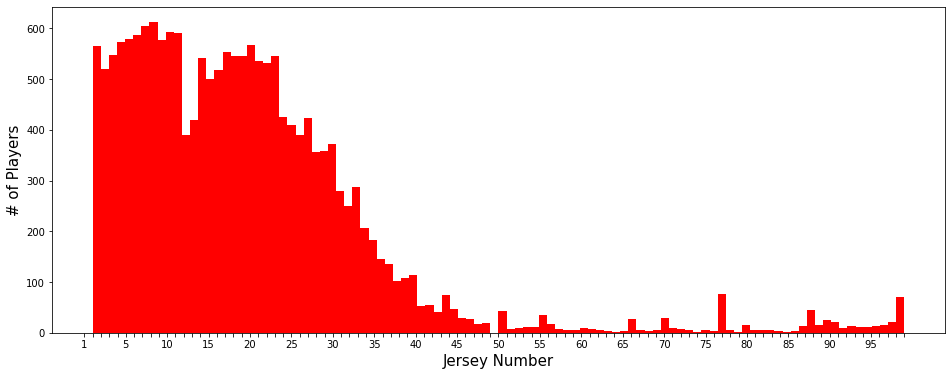

In [25]:
# Let's do this by plotting a histogram with the distribution of releases by year
fifa["Jersey Number"].hist(bins=100,figsize=(16,6), grid=False, color="red")
plt.xlabel("Jersey Number", size=15)
plt.xticks(range(100), labels = [1,"","","","",5,"","","","",10,"","","","",15,"","","","",20,"","","","",25,"","","","",30,"","","","",35,"","","","",40,"","","","",45,"","","","",50,"","","","",55,"","","","",60,"","","","",65,"","","","",70,"","","","",75,"","","","",80,"","","","",85,"","","","",90,"","","","",95,"","","",""])
plt.ylabel("# of Players", size=15)
plt.show()

#### Distribution of Age

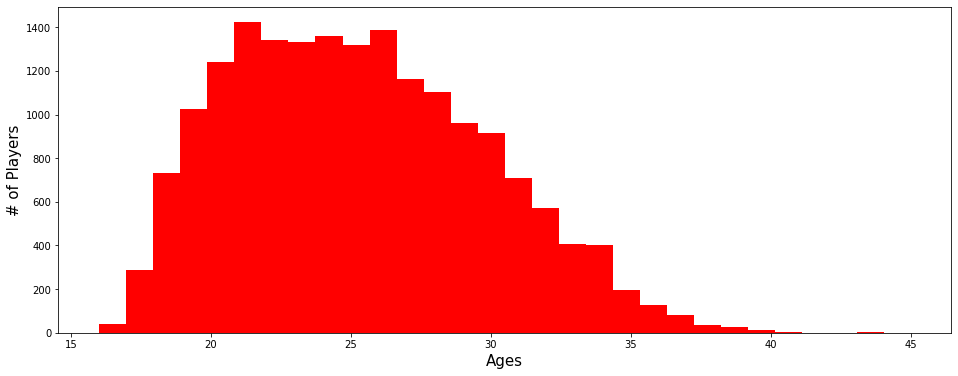

In [26]:
# Let's do this by plotting a histogram with the distribution of releases by year
fifa["Age"].hist(bins=30,figsize=(16,6), grid=False, color="red")
plt.xlabel("Ages", size=15)
plt.ylabel("# of Players", size=15)
plt.show()

#### Week foot

In [57]:
fifa["Overall"].groupby(fifa["Preferred Foot"]).mean()

Preferred Foot
Left     66.801472
Right    66.083381
Name: Overall, dtype: float64

In [58]:
fifa["Potential"].groupby(fifa["Preferred Foot"]).mean()

Preferred Foot
Left     71.739492
Right    71.192214
Name: Potential, dtype: float64

In conclusion, the preferred Foot has not a significant effect on the Rating of players.

#### Country of origin of players

<AxesSubplot:>

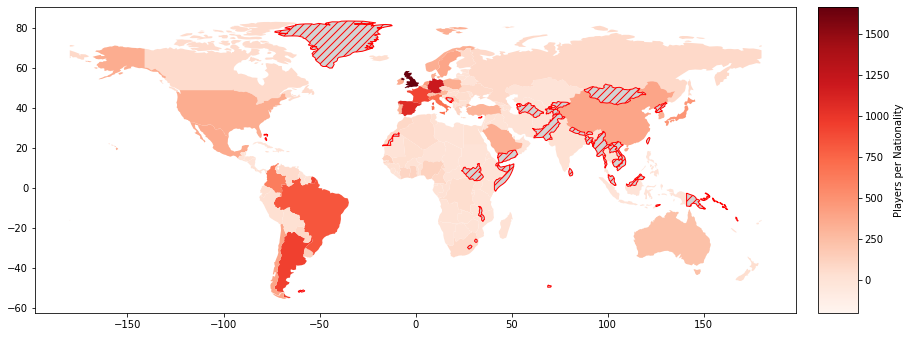

In [29]:
# Importing the world map Geopandas
world_data = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Formatting the world data to fit my Fifa dataset (excludin Antartica, droping useless columns and renaming countries)
world_data = world_data[world_data.name!="Antarctica"]
world_data.drop(columns=["pop_est","gdp_md_est"], inplace=True)
world_data.rename(columns={"name":"Country"}, inplace=True)
world_data.Country = (world_data.Country.str.replace("Côte d'Ivoire","Ivory Coast").replace("Czechia","Czech Republic")
                      .replace('Dominican Rep.','Dominican Republic').replace("Trinidad and Tobago","Trinidad & Tobago")
                      .replace("United Kingdom","England").replace("Eq. Guinea",'Equatorial Guinea'))

# Counting the number of players per country
players_per_country = fifa.groupby("Nationality")["Name"].count()
players_per_country = players_per_country.reset_index().rename(columns={"Nationality":"Country","Name":"Count_Players"})
#players_per_country.head(20)

# Joining the count from previously with the Geopandas World_Data 
world_data = world_data.merge(players_per_country, left_on="Country", right_on="Country", how="left")
#world_data.isna().sum()

# Formating the axes
from mpl_toolkits.axes_grid1 import make_axes_locatable
fig, ax = plt.subplots(1, 1, figsize=(15,10))
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)

# Plotting the number of players per country in a Geopandas Map
world_data.plot(column=world_data["Count_Players"], legend=True, ax=ax, cax=cax, cmap='Reds', vmin=-199,
                legend_kwds={'label': "Players per Nationality"}, missing_kwds={
                 "color": "lightgrey",
                 "edgecolor": "red",
                 "hatch": "///",
                 "label": "Missing values"})


#### Blabla

#### Rating

In [76]:
print(list(set(fifa.Age)))

[16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 44, 45]


/usr/local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Overall', ylabel='Potential'>

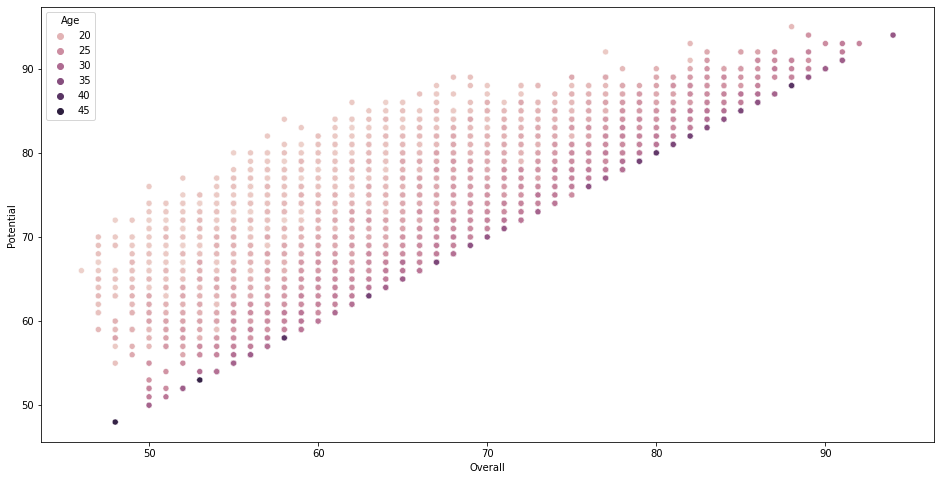

In [77]:
# Plotting the relationship between Overall and Potential Ratings
fig, ax = plt.subplots(figsize=(16,8))
sns.scatterplot(fifa["Overall"], fifa["Potential"], hue=fifa.Age, )

## Heatmap (Correlation matrix) between Player Rating and his skills

<AxesSubplot:>

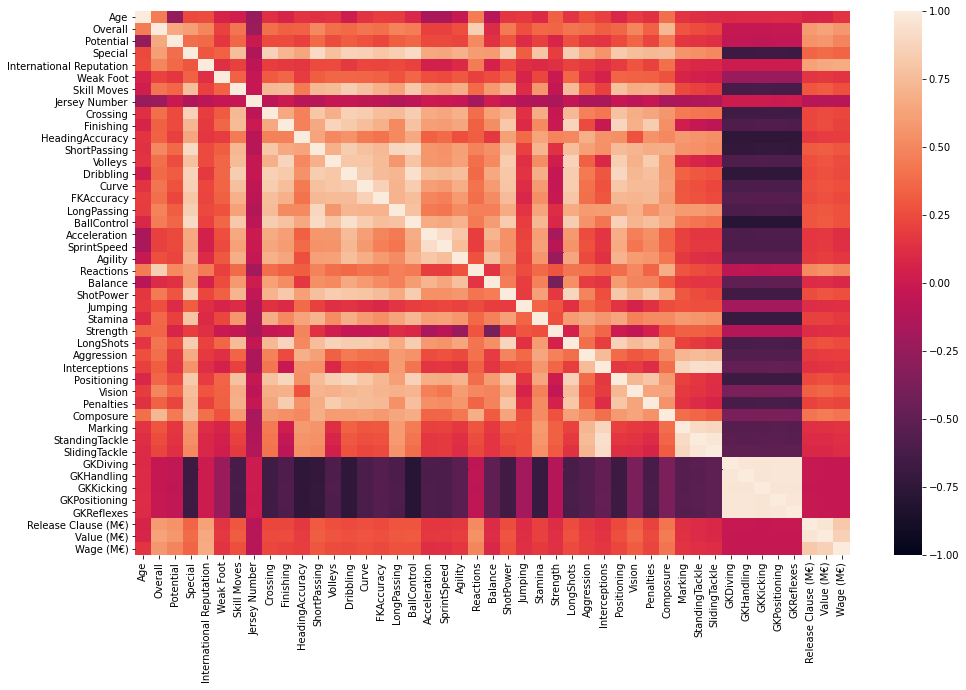

In [70]:
fig, ax = plt.subplots(figsize=(16,10))
sns.heatmap(fifa.select_dtypes(include=np.number).corr(), vmin=-1.0)

## Which one is the best team ?

## Trying to come up with the best team ever

In [79]:
fifa[['LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW', 'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM', 'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB']]

,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,...,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB
ID,,,,,,,,,,,,,,,,,,,,,
158023,88+2,88+2,88+2,92+2,93+2,93+2,93+2,92+2,93+2,93+2,...,64+2,61+2,61+2,61+2,64+2,59+2,47+2,47+2,47+2,59+2
20801,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,...,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
190871,84+3,84+3,84+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,...,65+3,60+3,60+3,60+3,65+3,60+3,47+3,47+3,47+3,60+3
193080,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
192985,82+3,82+3,82+3,87+3,87+3,87+3,87+3,87+3,88+3,88+3,...,77+3,77+3,77+3,77+3,77+3,73+3,66+3,66+3,66+3,73+3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238813,42+2,42+2,42+2,44+2,44+2,44+2,44+2,44+2,45+2,45+2,...,44+2,45+2,45+2,45+2,44+2,45+2,45+2,45+2,45+2,45+2
243165,45+2,45+2,45+2,39+2,42+2,42+2,42+2,39+2,40+2,40+2,...,30+2,31+2,31+2,31+2,30+2,29+2,32+2,32+2,32+2,29+2
241638,45+2,45+2,45+2,45+2,46+2,46+2,46+2,45+2,44+2,44+2,...,34+2,30+2,30+2,30+2,34+2,33+2,28+2,28+2,28+2,33+2
